# What Am I Looking At?
***
### EDA Classification for <span style='color:teal'>Painting</span> and <span style='color:purple'>Photograph</span> Images

### Imports
***

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io, color, filters
from skimage.transform import resize, rotate

import PIL
from PIL import Image
import glob

import tensorflow as tf
from tensorflow.keras import layers, Sequential
keras = tf.keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling1D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, ResNet50, EfficientNetB0, EfficientNetB4
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Model, load_model

import os
from tensorflow.keras.callbacks import TensorBoard

#import torch

from datetime import datetime

#from google.colab import files
#%load_ext tensorboard

Type: <class 'numpy.ndarray'>
Shape: (400, 400, 3)


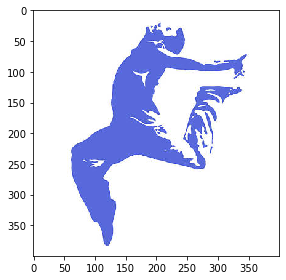

In [2]:
practice_image = io.imread('data/Raw Data/painting/000f6904299a382edafaf7396ce5f80295389f52.jpg')
print('Type: {}'.format(type(practice_image)))
print('Shape: {}'.format(practice_image.shape))
io.imshow(practice_image);

In [25]:
practice_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### <span style='color:magenta'>Preparing the Data</span>
***


In [26]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes = ['painting', 'photos'], class_mode='categorical')
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes = ['painting', 'photos'], class_mode='categorical')
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes = ['painting', 'photos'], class_mode='categorical')


Found 7041 images belonging to 2 classes.
Found 3010 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


In [7]:
type(train_batches)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [76]:
print(test_batches.__dict__)

{'image_data_generator': <tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x1a69b71dd0>, 'target_size': (224, 224), 'color_mode': 'rgb', 'data_format': 'channels_last', 'image_shape': (224, 224, 3), 'save_to_dir': None, 'save_prefix': '', 'save_format': 'png', 'interpolation': 'nearest', 'split': None, 'subset': None, 'directory': 'data/test', 'classes': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [75]:
print(test_batches.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Type: <class 'numpy.ndarray'>
Shape: (400, 400, 3)


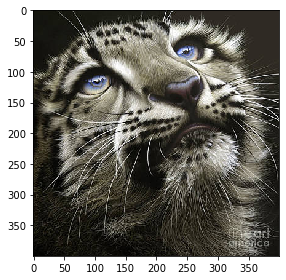

In [24]:
practice_test_image = io.imread('data/test/5021.jpg')
print('Type: {}'.format(type(practice_test_image)))
print('Shape: {}'.format(practice_test_image.shape))
io.imshow(practice_test_image);

In [32]:
test_batches

### <span style='color:magenta'>VGG Model</span>
***

In [34]:
VGGmodel_ = load_model('saved_models/VGG_16_20210514.h5')

In [35]:
VGG_prediction = VGGmodel_.predict(test_batches)

In [36]:
VGG_prediction

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.91347629e-36],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.05316951e-06, 9.99998927e-01],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [5.66901908e-37, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.39026413e-22],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

In [37]:
VGG_prediction.argmax(axis = 1)

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [77]:
VGGmodel_.evaluate(test_batches)

10/10 [==============================] - 43s 4s/step - loss: 38.3121 - accuracy: 0.7871


[38.31209182739258, 0.7870967984199524]

### <span style='color:magenta'>ResNet50 Model</span>
***

In [91]:
RN50model_ = load_model('saved_models/RN_50_202105162118.h5')

In [92]:
RN50_prediction = RN50model_.predict(test_batches)

In [40]:
RN50_prediction

array([[1.37388706e-04, 7.16206133e-02],
       [1.85509509e-06, 9.99732971e-01],
       [2.47912558e-05, 9.99899864e-01],
       [2.99547911e-02, 9.99844670e-01],
       [1.93594806e-05, 9.96976733e-01],
       [1.70798898e-01, 9.99867857e-01],
       [5.67620099e-02, 9.78883266e-01],
       [5.75840473e-04, 9.99669850e-01],
       [8.28027725e-04, 9.79225814e-01],
       [3.37004662e-04, 9.99992371e-01],
       [6.15136027e-01, 9.87944901e-01],
       [1.80307031e-03, 9.99942780e-01],
       [9.36367815e-06, 9.99997258e-01],
       [3.87808681e-03, 9.99941707e-01],
       [4.79578972e-04, 9.99959111e-01],
       [1.71457020e-06, 7.05433905e-01],
       [5.20183994e-06, 9.99765098e-01],
       [5.64575195e-04, 9.52091396e-01],
       [1.31976604e-03, 9.97268558e-01],
       [4.41310632e-08, 9.99919176e-01],
       [2.02792883e-03, 9.99391556e-01],
       [1.15628541e-02, 9.63560820e-01],
       [1.47017986e-01, 9.96262431e-01],
       [3.98427248e-04, 9.99975801e-01],
       [1.752704

In [93]:
RN50model_.evaluate(test_batches)

10/10 [==============================] - 25s 2s/step - loss: 2.5632 - acc: 0.8516


[2.563220739364624, 0.85161292552948]

In [42]:
RN50_prediction.argmax(axis = 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

### <span style='color:magenta'>EfficientNetB0 Model</span>
***

In [88]:
EffNet_model_ = load_model('saved_models/EffNet_B0_20210516.h5')

In [89]:
EffNet_prediction = EffNet_model_.predict(test_batches)

In [90]:
EffNet_model_.evaluate(test_batches)

10/10 [==============================] - 13s 1s/step - loss: 3.3391 - acc: 0.8516


[3.339088201522827, 0.85161292552948]

In [99]:
#re-define the batch size
n_batch = 1

In [102]:
#re-define model
new_model = Sequential()
new_model.add(ResNet50(include_top = False, weights = 'imagenet', pooling = 'max'))
new_model.add(Dense(2))

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [103]:
#copy weights
old_weights = RN50model_.get_weights()
new_model.set_weights(old_weights)